In [2]:
"""
Obesity Level Classification with L1-penalized Logistic Regression Path
"""
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv("data.csv")

In [4]:
df = df[df["NObeyesdad"].isin(["Normal_Weight", "Obesity_Type_I"])]
df["target"] = df["NObeyesdad"].map({"Normal_Weight": 0, "Obesity_Type_I": 1})

X = df.drop(columns=["NObeyesdad", "target"])
y = df["target"].values


In [5]:
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

In [6]:
X_transformed = preprocessor.fit_transform(X)

X_transformed = X_transformed / X_transformed.max()

cs = l1_min_c(X_transformed, y, loss="log") * np.logspace(0, 10, 16)

In [7]:
clf = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

In [8]:
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_transformed, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

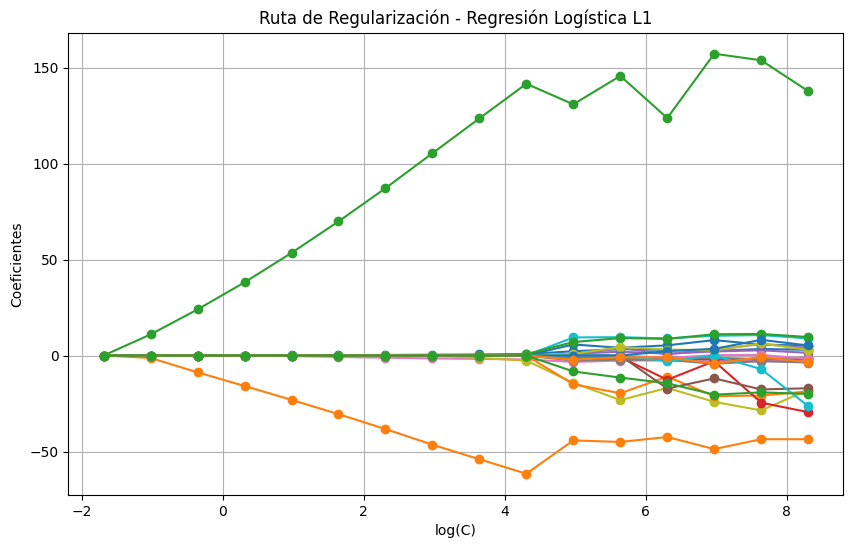

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(cs), coefs_, marker="o")
plt.xlabel("log(C)")
plt.ylabel("Coeficientes")
plt.title("Ruta de Regularización - Regresión Logística L1")
plt.axis("tight")
plt.grid(True)
plt.show()
